# Day 08. Exercise 00
# Binary classifier. Logistic regression

## 0. Imports

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [19]:
# PATH
df_raw = pd.read_csv('../data/checker_timestamp.csv')

In [20]:
# 'timestamp'(string) -> datetime
df_raw['timestamp'] = pd.to_datetime(df_raw['timestamp'])

In [21]:
df_raw['date'] = df_raw['timestamp'].dt.date
df_raw['hour'] = df_raw['timestamp'].dt.hour
df_raw['day_of_week'] = df_raw['timestamp'].dt.dayofweek

In [22]:
df_raw.head()

,timestamp,date,hour,day_of_week
0,2020-04-17 05:19:02.744528,2020-04-17,5,4
1,2020-04-17 05:22:35.249331,2020-04-17,5,4
2,2020-04-17 05:22:45.549397,2020-04-17,5,4
3,2020-04-17 05:34:14.691200,2020-04-17,5,4
4,2020-04-17 05:34:24.422370,2020-04-17,5,4


In [23]:
data = []

unique_dates = df_raw['date'].unique()

In [ ]:
for d in unique_dates:
    day_logs = df_raw[df_raw['date'] == d]

    am = day_logs[day_logs['hour'] < 12].shape[0]
    
    pm = day_logs[day_logs['hour'] >= 12].shape[0]
    
    day_num = day_logs.iloc[0]['day_of_week']
    target = 'weekend' if day_num >= 5 else 'working_day'
     
    data.append({'date': d, 'am': am, 'pm': pm, 'target': target})

In [8]:
df = pd.DataFrame(data)

df.head(10)

,date,am,pm,target
0,2020-04-17,21,2,working_day
1,2020-04-18,1,68,weekend
2,2020-04-19,18,15,weekend
3,2020-04-20,2,23,working_day
4,2020-04-21,0,25,working_day
5,2020-04-22,0,28,working_day
6,2020-04-23,10,33,working_day
7,2020-04-24,2,14,working_day
8,2020-04-25,30,74,weekend
9,2020-04-26,28,233,weekend


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


- By looking at the graph do you think it will be easy to classify the days having those two features? Put your answer in the markdown cell in the end of that sectioin: "yes, it is easy" or "no, it is not easy".

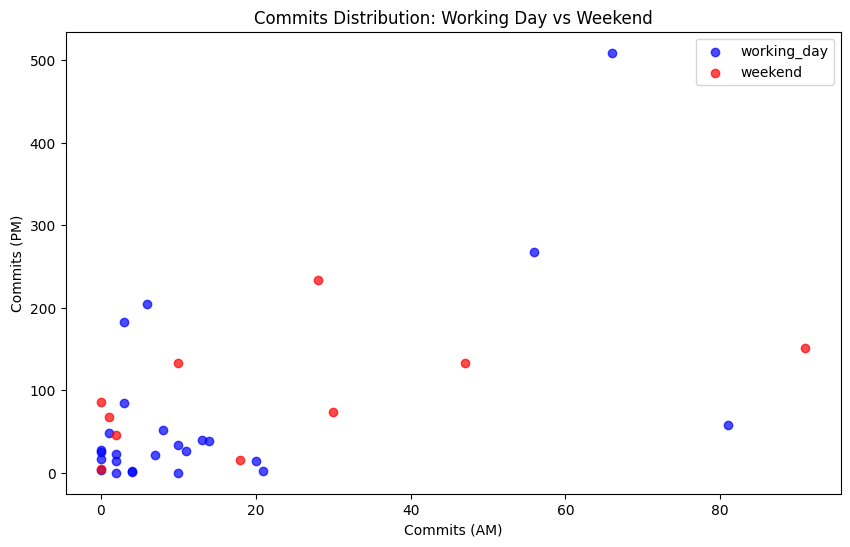

In [9]:
plt.figure(figsize=(10, 6))

working = df[df['target'] == 'working_day']
weekend = df[df['target'] == 'weekend']
plt.scatter(working['am'], working['pm'], color='blue', label='working_day', alpha=0.7)

plt.scatter(weekend['am'], weekend['pm'], color='red', label='weekend', alpha=0.7)

plt.xlabel('Commits (AM)')
plt.ylabel('Commits (PM)')
plt.title('Commits Distribution: Working Day vs Weekend')
plt.legend()
plt.show()

No, it is not easy. The classes are not linearly separable. The weekend data points (red) are mixed with the working day data points (blue), so drawing a straight line to separate them is impossible.

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.


- By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "yes, it is good"; "no, it is not good".

In [10]:
X = df[['am', 'pm']]
y = df['target']

In [11]:
model = LogisticRegression(random_state=21, fit_intercept=False)

In [12]:
model.fit(X, y)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",False
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",21
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mult

In [13]:
df['predict'] = model.predict(X)


In [14]:
df.to_csv('../data/am_pm.csv', index=False)

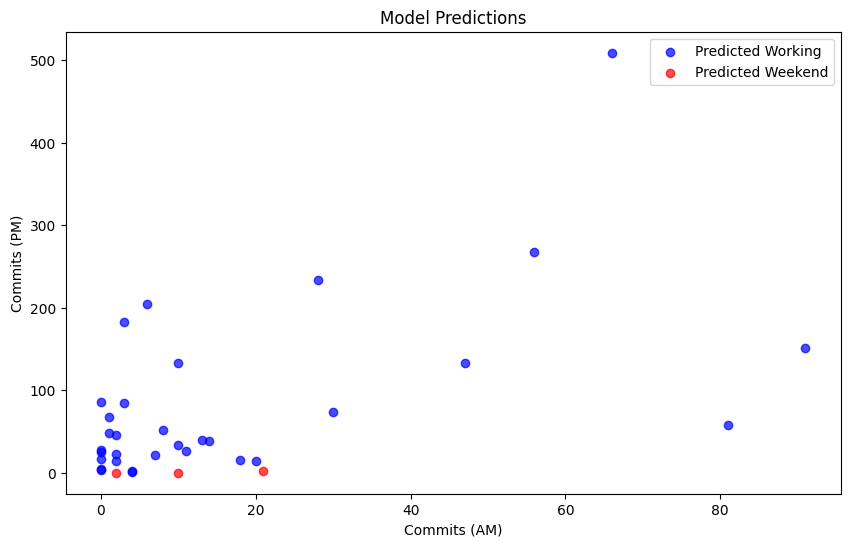

In [15]:
plt.figure(figsize=(10, 6))
pred_working = df[df['predict'] == 'working_day']
pred_weekend = df[df['predict'] == 'weekend']

plt.scatter(pred_working['am'], pred_working['pm'], color='blue', label='Predicted Working', alpha=0.7)
plt.scatter(pred_weekend['am'], pred_weekend['pm'], color='red', label='Predicted Weekend', alpha=0.7)

plt.xlabel('Commits (AM)')
plt.ylabel('Commits (PM)')
plt.title('Model Predictions')
plt.legend()
plt.show()

No, it is not easy. The classes are not linearly separable. The weekend data points (red) are mixed with the working day data points (blue), so drawing a straight line to separate them is impossible.

## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.


- Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "yes, it is good"; "no, it is not good".

In [16]:
model_acc = accuracy_score(df['target'], df['predict'])
print(f"Model Accuracy: {model_acc:.2f}")



Model Accuracy: 0.63


In [17]:
most_frequent_class = df['target'].mode()[0] 
print(f"Most frequent class is: {most_frequent_class}")

naive_predictions = [most_frequent_class] * len(df)
naive_acc = accuracy_score(df['target'], naive_predictions)
print(f"Naive Accuracy: {naive_acc:.2f}")

Most frequent class is: working_day
Naive Accuracy: 0.71


No, it is not good. The model accuracy (0.63) is lower than the naive accuracy (0.71). This means our model performs worse than simply guessing the most frequent class for every observation. The features 'am' and 'pm' are not sufficient to distinguish between weekends and weekdays in this specific dataset.